# Time series solution 

## Data description 

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

## Work Process 

1. Import necessary libraries.
2. Load the data and set the date as the index.
3. Clean the data by filtering out extreme values.
4. Create functions for each type of plot (line, bar, box).
5. Call the functions to display the plots.

In [57]:
# Library import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [58]:
df = pd.read_csv('/Users/bayusedana/Documents/GitHub/Python-Projects/Projects/Page Series Time View Viz/fcc-forum-pageviews.csv')

df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [59]:
# Checking the data if any null values

null_values = df.isnull().sum()
print(null_values)

date     0
value    0
dtype: int64


In [60]:
# Set date to index

df['date'] = pd.to_datetime(df['date'])
df.set_index(keys='date', inplace=True)

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [61]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
lower_treshold = df['value'].quantile(0.025)
upper_treshold = df['value'].quantile(0.975)

df_filter = df[(df['value'] >= lower_treshold) & (df['value'] <= upper_treshold)]

df_filter

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Draw a line plot based on the filtered data

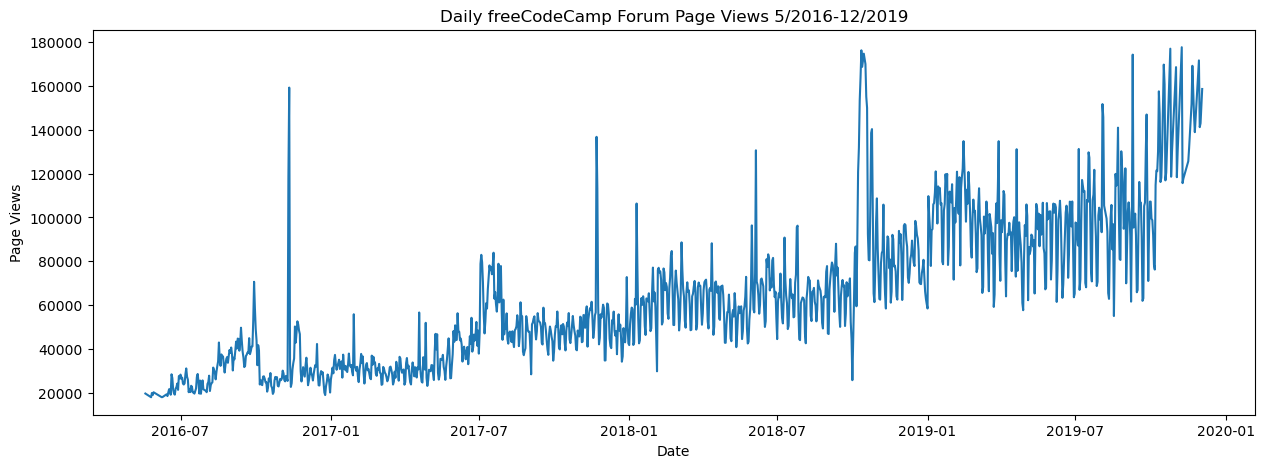

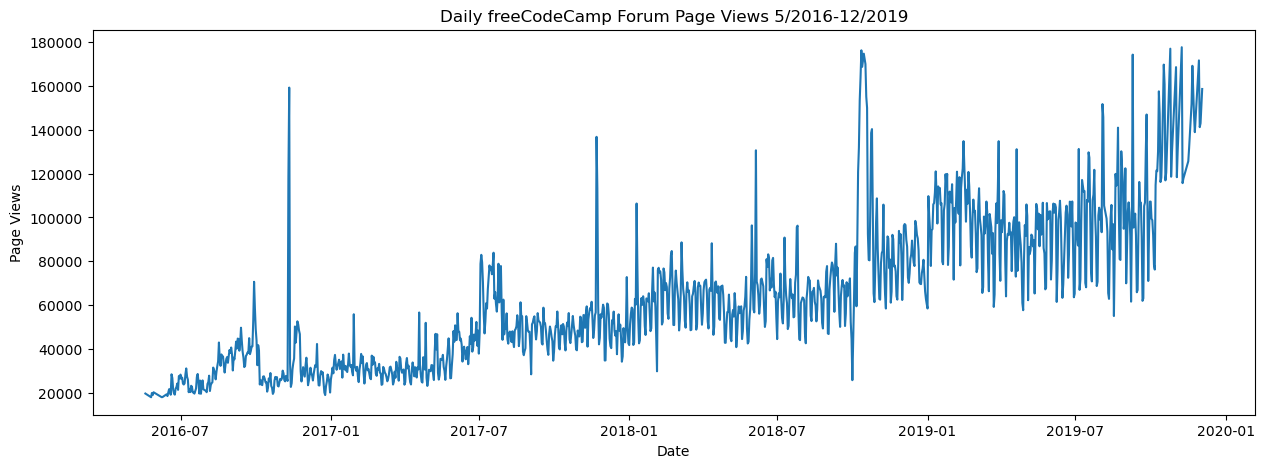

In [ ]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15,5))

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    sns.lineplot(
        data=df_filter,
        x=df_filter.index,
        y='value',
        ax=ax,
    )
    
    fig.savefig('Page Views Codecamp 2016 - 2019.png')
    plt.show()
    return fig

draw_line_plot()

### Draw a bar plot based on the filtered data. Show average daily page views for each month grouped by year.


/var/folders/mv/2nq220sx65x1lx6mc02c0zjc0000gn/T/ipykernel_23465/155487773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['year'] = df_filter.index.year
/var/folders/mv/2nq220sx65x1lx6mc02c0zjc0000gn/T/ipykernel_23465/155487773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['month'] = df_filter.index.month


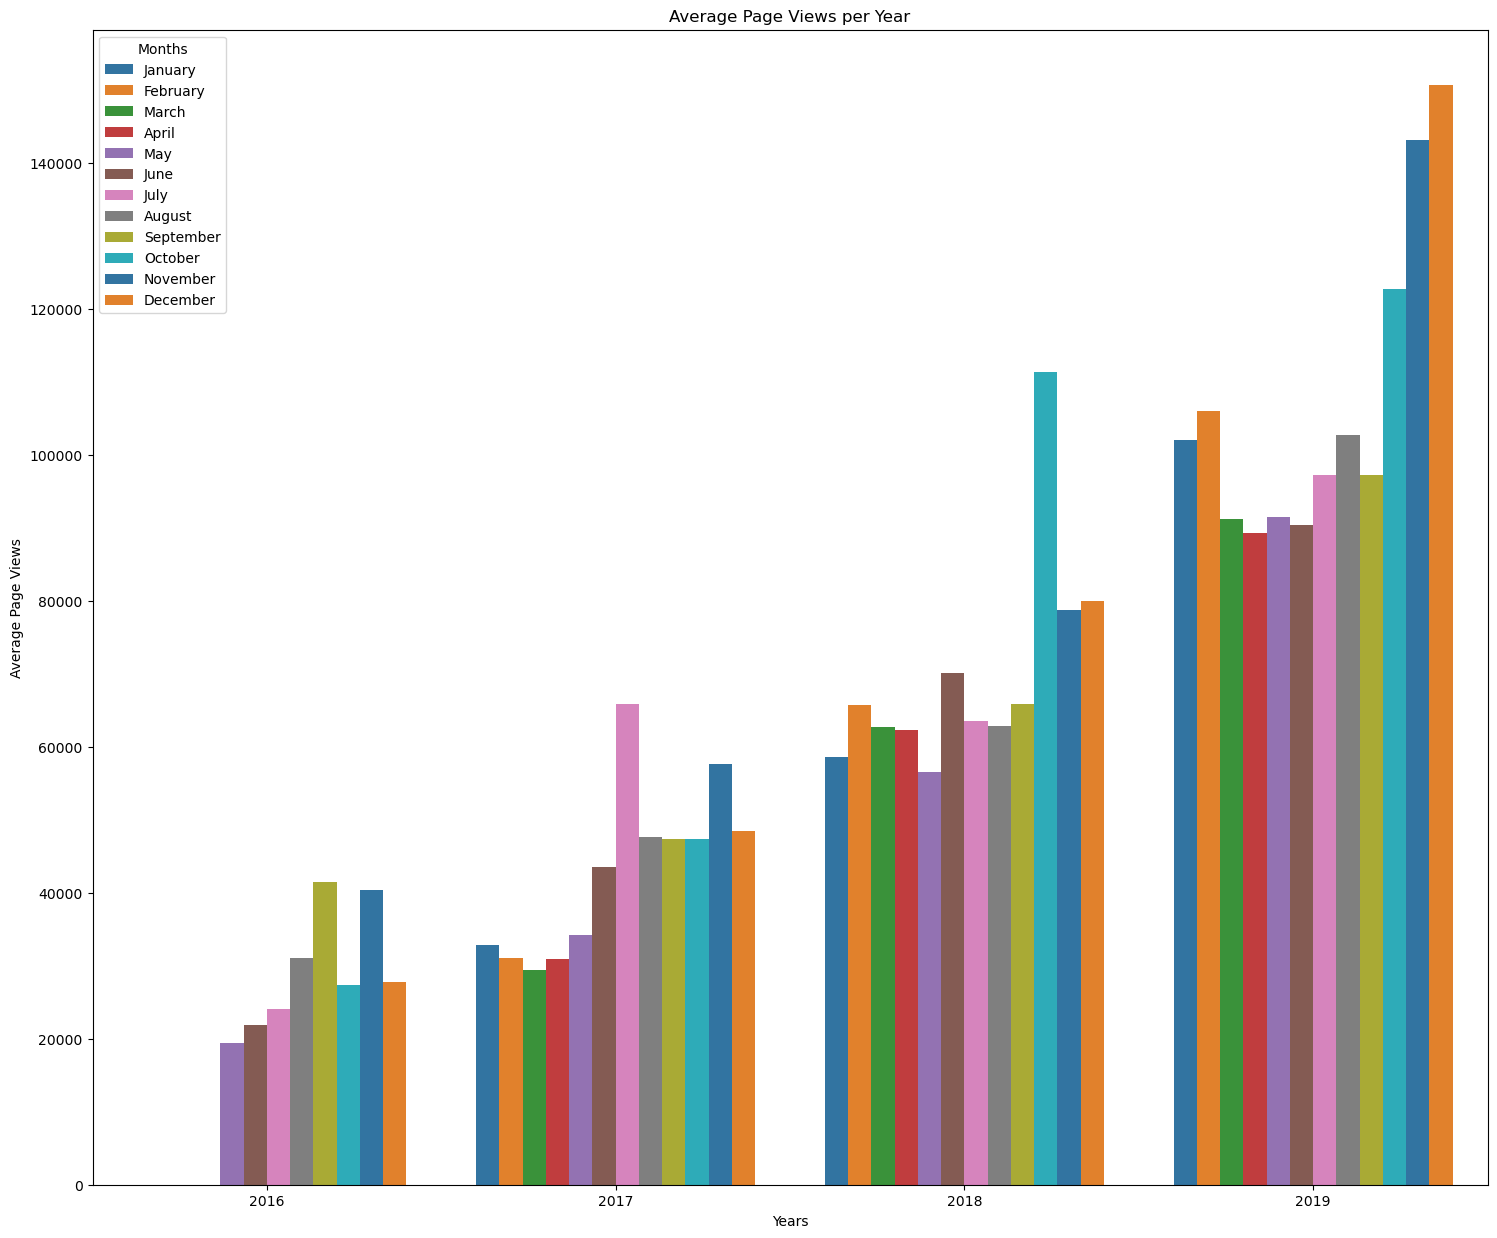

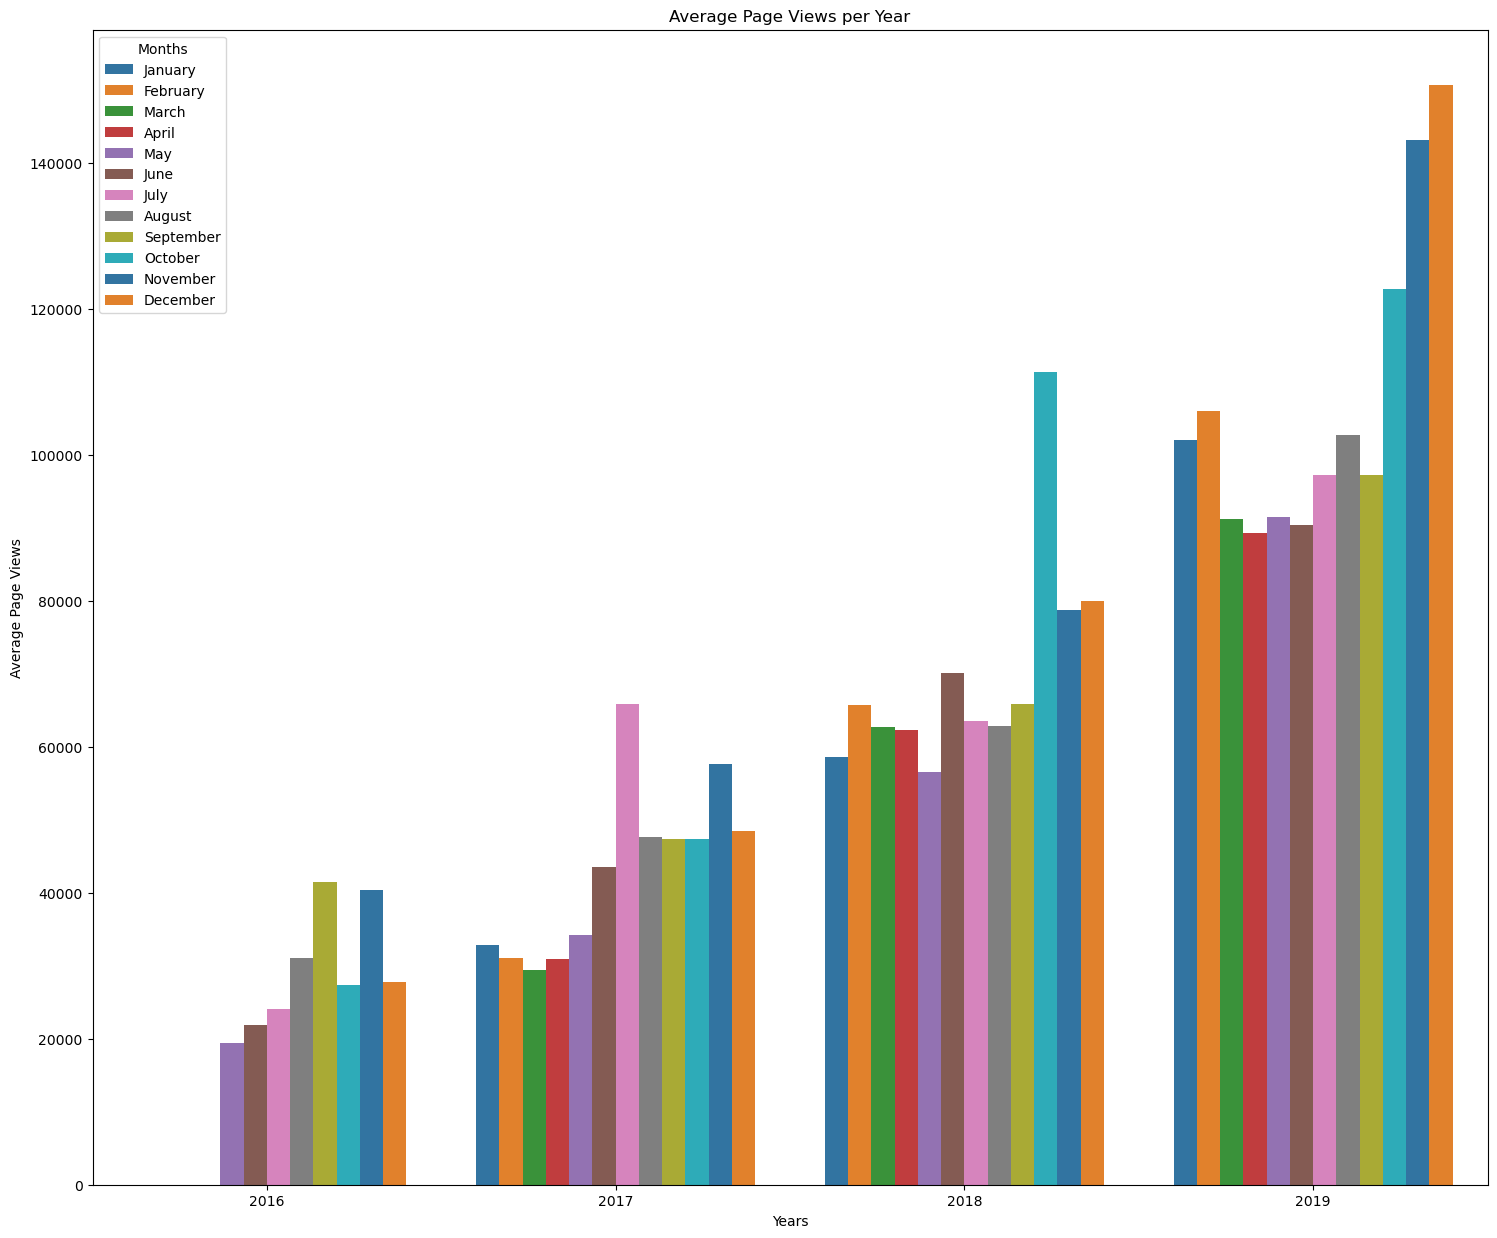

In [63]:
def draw_bar_plot():
    # Extracting year and month from the index
    df_filter['year'] = df_filter.index.year
    df_filter['month'] = df_filter.index.month

    # Grouping and calculating the mean
    df_grouped = df_filter.groupby(['year', 'month'])['value'].mean().unstack()

    # Convert to long format for seaborn compatibility
    df_long = df_grouped.reset_index().melt(id_vars='year', var_name='month', value_name='average_page_views')

    # Map month numbers to month names
    df_long['month'] = df_long['month'].apply(lambda x: calendar.month_name[x])

    fig, ax = plt.subplots(figsize=(18, 15))

    sns.barplot(
        data=df_long,
        x='year',
        y='average_page_views',
        hue='month',
        palette='tab10',
        ax=ax
    )
    
    # Customizing labels and title
    ax.set_title('Average Page Views per Year')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')

    fig.savefig('Average Page Views per Year.png')
    plt.show()
    return fig

draw_bar_plot()

### Draw a box plot to show how the values are distributed within a given year or month and how it compares over time.

/var/folders/mv/2nq220sx65x1lx6mc02c0zjc0000gn/T/ipykernel_23465/3501606159.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])


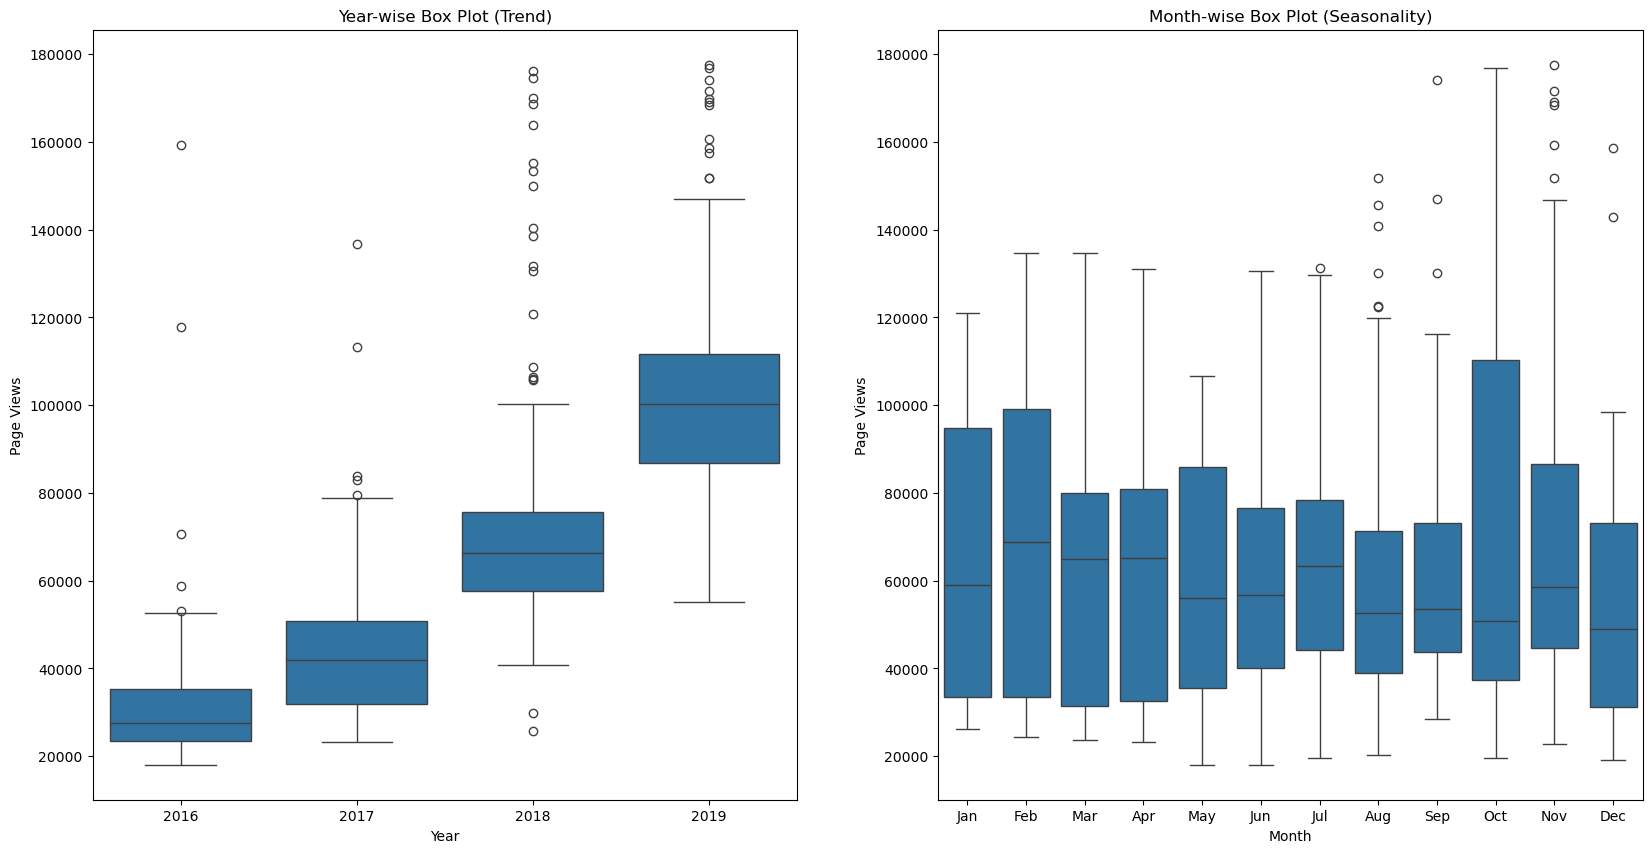

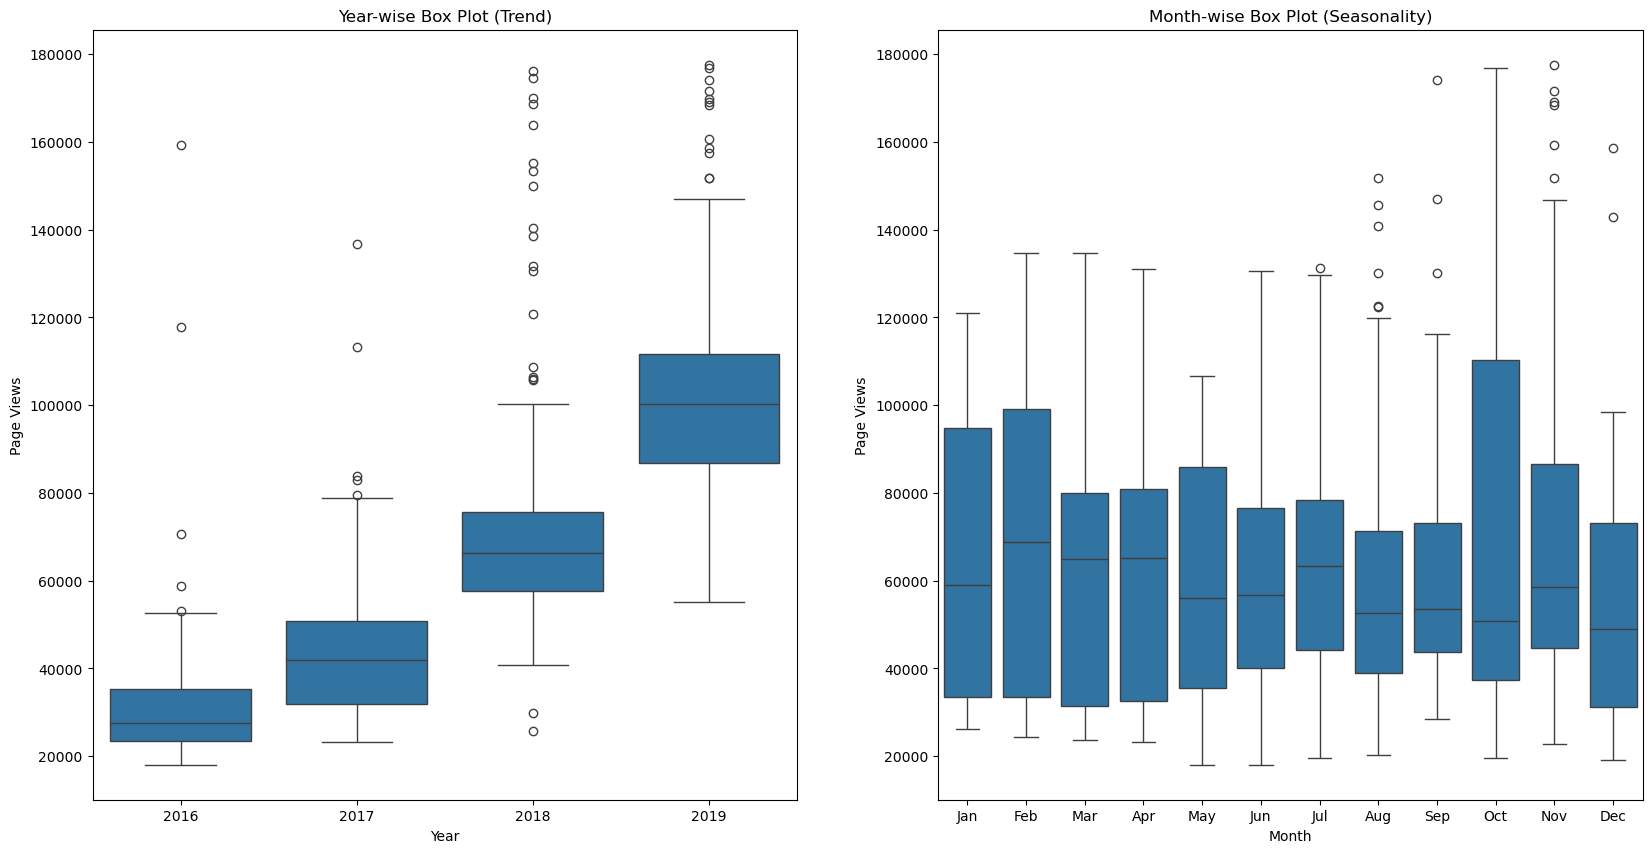

In [64]:
def draw_box_plot():
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    # Year box plots
    sns.boxplot(
        data=df_filter,
        x='year',
        y='value',
        ax=ax[0]
    )

    # Customizing labels and title
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')

    # Month box plots
    sns.boxplot(
        data=df_filter,
        x='month',
        y='value',
        ax=ax[1]
    )

    ax[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')

    fig.savefig('Year-wise Box Plot (Trend) and Month-wise Box Plot (Seasonality).png')
    plt.show()
    return fig

draw_box_plot()